Import Libraries

In [1]:
import tensorflow as tf
import numpy as np
import os
import cv2
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import InputLayer, Conv2D, BatchNormalization, MaxPooling2D, GlobalMaxPooling2D, Dense, Dropout
import matplotlib.pyplot as plt
import seaborn as sns
import h5py

Parameter Setup

In [2]:
BATCH_SIZE = 32
EPOCHS = 200

In [3]:
model = str(input('socofing / socofing-r / family : '))

# Processed
# dataset1-socofing
if model == 'socofing':
    m_path_p = r'C:\Skripsi\FingeprintClassification\datasets\base\dataset1-socofing\processed\M'
    f_path_p = r'C:\Skripsi\FingeprintClassification\datasets\base\dataset1-socofing\processed\F'
    IMG_SIZE_p = (128, 128)
    IMG_SHAPE_p = (128, 128, 1)
    model_name_p = 'model-dataset1-socofing-processed'
    
    m_path_r = r'C:\Skripsi\FingeprintClassification\datasets\base\dataset1-socofing\raw\M'
    f_path_r = r'C:\Skripsi\FingeprintClassification\datasets\base\dataset1-socofing\raw\F'
    IMG_SIZE_r = (96, 96)
    IMG_SHAPE_r = (96, 96, 1)
    model_name_r = 'model-dataset1-socofing-raw'
    
    m_paths_p = [
        r'C:\Skripsi\FingeprintClassification\datasets\base\dataset1-socofing\processed\M\E',
        r'C:\Skripsi\FingeprintClassification\datasets\base\dataset1-socofing\processed\M\H',
        r'C:\Skripsi\FingeprintClassification\datasets\base\dataset1-socofing\processed\M\M',
        r'C:\Skripsi\FingeprintClassification\datasets\base\dataset1-socofing\processed\M\R'
    ]
    f_paths_p = [
        r'C:\Skripsi\FingeprintClassification\datasets\base\dataset1-socofing\processed\F\E',
        r'C:\Skripsi\FingeprintClassification\datasets\base\dataset1-socofing\processed\F\H',
        r'C:\Skripsi\FingeprintClassification\datasets\base\dataset1-socofing\processed\F\M',
        r'C:\Skripsi\FingeprintClassification\datasets\base\dataset1-socofing\processed\F\R'
    ]

    m_paths_r = [
        r'C:\Skripsi\FingeprintClassification\datasets\base\dataset1-socofing\raw\M\E',
        r'C:\Skripsi\FingeprintClassification\datasets\base\dataset1-socofing\raw\M\H',
        r'C:\Skripsi\FingeprintClassification\datasets\base\dataset1-socofing\raw\M\M',
        r'C:\Skripsi\FingeprintClassification\datasets\base\dataset1-socofing\raw\M\R'
    ]
    f_paths_r = [
        r'C:\Skripsi\FingeprintClassification\datasets\base\dataset1-socofing\raw\F\E',
        r'C:\Skripsi\FingeprintClassification\datasets\base\dataset1-socofing\raw\F\H',
        r'C:\Skripsi\FingeprintClassification\datasets\base\dataset1-socofing\raw\F\M',
        r'C:\Skripsi\FingeprintClassification\datasets\base\dataset1-socofing\raw\F\R'
    ]

elif model == 'socofing-r':
    m_path_p = r'C:\Skripsi\FingeprintClassification\datasets\base\dataset1-socofing-r\processed\M'
    f_path_p = r'C:\Skripsi\FingeprintClassification\datasets\base\dataset1-socofing-r\processed\F'
    IMG_SIZE_p = (256, 256)
    IMG_SHAPE_p = (256, 256, 1)
    model_name_p = 'model-dataset2-socofing-r-processed'
    
    m_path_r = r'C:\Skripsi\FingeprintClassification\datasets\base\dataset1-socofing-r\raw\M'
    f_path_r = r'C:\Skripsi\FingeprintClassification\datasets\base\dataset1-socofing-r\raw\F'
    IMG_SIZE_r = (96, 96)
    IMG_SHAPE_r = (96, 96, 1)
    model_name_r = 'model-dataset2-socofing-r-raw'

# dataset2-family
elif model == 'family':
    m_path_p = r'C:\Skripsi\FingeprintClassification\datasets\base\dataset2-family\processed\M'
    f_path_p = r'C:\Skripsi\FingeprintClassification\datasets\base\dataset2-family\processed\F'
    IMG_SIZE_p = (256, 256)
    IMG_SHAPE_p = (256, 256, 1)
    model_name_p = 'model-dataset2-family-processed'
    
    m_path_r = r'C:\Skripsi\FingeprintClassification\datasets\base\dataset2-family\raw\M'
    f_path_r = r'C:\Skripsi\FingeprintClassification\datasets\base\dataset2-family\raw\F'
    IMG_SIZE_r = (512, 512)
    IMG_SHAPE_r = (512, 512, 1)
    model_name_r = 'model-dataset2-family-raw'

In [4]:
# Function to load image data
def load_data(path):
    files = [cv2.imread(os.path.join(path, file), cv2.IMREAD_GRAYSCALE) for file in os.listdir(path)]
    files = np.expand_dims(files, axis=-1) / 255.0
    return files

In [5]:
# Function to create CNN model
def create_cnn_model(input_shape):
    model = Sequential()
    
    model.add(InputLayer(input_shape=input_shape))
    
    model.add(Conv2D(16, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.15))
    
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.15))
    
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.15))
    
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.15))
    
    model.add(GlobalMaxPooling2D())
    
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.3))
    
    model.add(Dense(2, activation='softmax'))
    
    model.summary()
    return model

In [6]:
def train_model(X_train, y_train, X_val, y_val, input_shape, model_name, model):
    # Count male and female data in the training data
    # if model == 'socofing':
    male_count = np.sum(np.argmax(y_train, axis=1) == gender_dict['M'])
    female_count = np.sum(np.argmax(y_train, axis=1) == gender_dict['F'])
    print("Number of male data:", male_count)
    print("Number of female data:", female_count)

    # Model creation and compilation
    model = create_cnn_model(input_shape)
    model.compile(optimizer=tf.keras.optimizers.Adam(),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',
                                                     factor=0.1,
                                                     patience=20,
                                                     min_lr=1e-7)

    # Training the model without data augmentation
    history = model.fit(X_train, y_train,
                        batch_size=BATCH_SIZE,
                        epochs=EPOCHS,
                        validation_data=(X_val, y_val),
                        callbacks=[reduce_lr])

    # Save the model
    model.save(r'C:\Skripsi\FingeprintClassification\model_res\{}-fix.h5'.format(model_name))

    # Save the history to HDF5 file
    history_file_path = r'C:\Skripsi\FingeprintClassification\model_res\{}_history-fix.h5'.format(model_name)
    with h5py.File(history_file_path, 'w') as hf:
        # Create a group to store the history data
        history_group = hf.create_group('history')

        # Store the history data as datasets within the group
        for key, value in history.history.items():
            history_group.create_dataset(key, data=value)

    return history, model

In [7]:
# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

In [8]:
# Function to print classification report
def print_classification_report(y_true, y_pred, target_names, title):
    report = classification_report(y_true, y_pred, target_names=target_names)
    print(title)
    print(report)

In [9]:
def load_history(filepath):
    with h5py.File(filepath, 'r') as hf:
        history = {}
        for key in hf['history']:
            history[key] = np.array(hf['history'][key])
    return history

In [10]:
gender_dict = {'M': 0, 'F': 1}

In [11]:
if model == 'family' or model == 'socofing-r':
    # Load raw data
    m_files = load_data(m_path_r)
    f_files = load_data(f_path_r)

    # Count male and female data
    num_male_data = len(m_files)
    num_female_data = len(f_files)

    # Print the counts of male and female data
    print(f'Original number of male data points: {num_male_data}')
    print(f'Original number of female data points: {num_female_data}')
    
    # Convert male files to a numpy array if it's not already
    m_files = np.array(m_files)
    
    # Downsample male data to match the number of female data
    if num_male_data > num_female_data:
        np.random.seed(42)  # Set seed for reproducibility
        downsample_indices = np.random.choice(num_male_data, size=num_female_data, replace=False)
        m_files_downsampled = m_files[downsample_indices]
    else:
        m_files_downsampled = m_files

    # Print the counts after downsampling
    print(f'Number of male data points after downsampling: {len(m_files_downsampled)}')
    print(f'Number of female data points (unchanged): {num_female_data}')

    # Concatenate downsampled male and female datasets
    X_raw = np.concatenate((m_files_downsampled, f_files), axis=0)

    # Create labels
    y_raw = np.array(['M'] * len(m_files_downsampled) + ['F'] * num_female_data)

    # Convert labels to integers
    y_raw = np.array([gender_dict[g] for g in y_raw])

    y_raw = tf.keras.utils.to_categorical(y_raw, num_classes=2)

    # Shuffle data and labels
    np.random.seed(42)
    indices = np.arange(X_raw.shape[0])
    np.random.shuffle(indices)
    X_raw = X_raw[indices]
    y_raw = y_raw[indices]

    # Split data into training and validation sets
    X_train_raw, X_val_raw, y_train_raw, y_val_raw = train_test_split(X_raw, y_raw, test_size=0.2, random_state=42)
    
    unique, counts = np.unique(y_train_raw.argmax(axis=1), return_counts=True)
    print(f'Training set class distribution: {dict(zip(unique, counts))}')
    
    unique, counts = np.unique(y_val_raw.argmax(axis=1), return_counts=True)
    print(f'Validation set class distribution: {dict(zip(unique, counts))}')

else:
    # Socofing model raw data loading and splitting
    X_train_raw, X_val_raw, y_train_raw, y_val_raw = [], [], [], []

    total_male_data = 0
    total_female_data = 0

    for m_path, f_path in zip(m_paths_r, f_paths_r):
        m_files = load_data(m_path)
        f_files = load_data(f_path)

        # Get the alteration folder name from the path
        alteration_folder = os.path.basename(m_path)

        num_male_data = len(m_files)
        num_female_data = len(f_files)

        # Printing the number of raw data for Socofing dataset before splitting for the current alteration folder
        print(f"For Socofing Dataset (Raw) - Alteration Folder: {alteration_folder}")
        print("Number of data in directory M:", num_male_data)
        print("Number of data in directory F:", num_female_data)

        # Downsample male data to match the number of female data
        if num_male_data > num_female_data:
            np.random.seed(42)  # Set seed for reproducibility
            downsample_indices = np.random.choice(num_male_data, size=num_female_data, replace=False)
            m_files = np.array(m_files)[downsample_indices]

        # Update the number of male data after downsampling
        num_male_data = len(m_files)

        # Print the counts after downsampling
        print(f'Number of male data points after downsampling: {num_male_data}')
        print(f'Number of female data points (unchanged): {num_female_data}')
        
        total_male_data += num_male_data
        total_female_data += num_female_data

        X = np.concatenate((m_files, f_files), axis=0)
        y = np.array(['M'] * num_male_data + ['F'] * num_female_data)

        y = np.array([gender_dict[g] for g in y])

        y = tf.keras.utils.to_categorical(y, num_classes=2)

        # Shuffle data and labels
        np.random.seed(42)
        indices = np.arange(X.shape[0])
        np.random.shuffle(indices)
        X = X[indices]
        y = y[indices]

        # Split data into training and validation sets
        X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
        X_train_raw.extend(X_train)
        X_val_raw.extend(X_val)
        y_train_raw.extend(y_train)
        y_val_raw.extend(y_val)

        # Printing the number of data used for training and validation in the current alteration folder
        print("Total number of data used for training in", alteration_folder, ":", len(X_train))
        print("Total number of data used for validation in", alteration_folder, ":", len(X_val))
        print()

    X_train_raw = np.array(X_train_raw)
    X_val_raw = np.array(X_val_raw)
    y_train_raw = np.array(y_train_raw)
    y_val_raw = np.array(y_val_raw)

    # Printing the total number of male and female data used for training and validation for Socofing dataset after splitting
    print("Total number of male data used for training in Socofing dataset (Raw):", total_male_data)
    print("Total number of female data used for training in Socofing dataset (Raw):", total_female_data)
    
    unique, counts = np.unique(y_train_raw.argmax(axis=1), return_counts=True)
    print(f'Training set class distribution: {dict(zip(unique, counts))}')
    
    unique, counts = np.unique(y_val_raw.argmax(axis=1), return_counts=True)
    print(f'Validation set class distribution: {dict(zip(unique, counts))}')

Original number of male data points: 500
Original number of female data points: 500
Number of male data points after downsampling: 500
Number of female data points (unchanged): 500
Training set class distribution: {0: 400, 1: 400}
Validation set class distribution: {0: 100, 1: 100}


In [12]:
# Train model for raw data
history_raw, model_raw = train_model(X_train_raw, y_train_raw, X_val_raw, y_val_raw, IMG_SHAPE_r, model_name_r, model)

Number of male data: 400
Number of female data: 400
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 510, 510, 16)      160       
                                                                 
 batch_normalization (BatchN  (None, 510, 510, 16)     64        
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 255, 255, 16)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 255, 255, 16)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 253, 253, 32)      4640      
                                                                 
 bat

In [13]:
if model == 'family' or model == 'socofing-r':
    # Load processed data
    m_files = load_data(m_path_p)
    f_files = load_data(f_path_p)

    # Count male and female data
    num_male_data = len(m_files)
    num_female_data = len(f_files)

    # Print the counts of male and female data
    print(f'Original number of male data points: {num_male_data}')
    print(f'Original number of female data points: {num_female_data}')

    # Convert male files to a numpy array if it's not already
    m_files = np.array(m_files)

    # Downsample male data to match the number of female data
    if num_male_data > num_female_data:
        np.random.seed(42)  # Set seed for reproducibility
        downsample_indices = np.random.choice(num_male_data, size=num_female_data, replace=False)
        m_files_downsampled = m_files[downsample_indices]
    else:
        m_files_downsampled = m_files

    # Print the counts after downsampling
    print(f'Number of male data points after downsampling: {len(m_files_downsampled)}')
    print(f'Number of female data points (unchanged): {num_female_data}')

    # Concatenate downsampled male and female datasets
    X_processed = np.concatenate((m_files_downsampled, f_files), axis=0)

    # Create labels
    y_processed = np.array(['M'] * len(m_files_downsampled) + ['F'] * num_female_data)

    # Convert labels to integers
    y_processed = np.array([gender_dict[g] for g in y_processed])

    y_processed = tf.keras.utils.to_categorical(y_processed, num_classes=2)

    # Shuffle data and labels
    np.random.seed(42)
    indices = np.arange(X_processed.shape[0])
    np.random.shuffle(indices)
    X_processed = X_processed[indices]
    y_processed = y_processed[indices]

    # Split data into training and validation sets
    X_train_processed, X_val_processed, y_train_processed, y_val_processed = train_test_split(X_processed, y_processed, test_size=0.2, random_state=42)
    
    unique, counts = np.unique(y_train_processed.argmax(axis=1), return_counts=True)
    print(f'Training set class distribution: {dict(zip(unique, counts))}')
    
    unique, counts = np.unique(y_val_processed.argmax(axis=1), return_counts=True)
    print(f'Validation set class distribution: {dict(zip(unique, counts))}')
else:
    # Socofing model processed data loading and splitting
    X_train_processed, X_val_processed, y_train_processed, y_val_processed = [], [], [], []

    total_male_data_processed = 0
    total_female_data_processed = 0

    for m_path, f_path in zip(m_paths_p, f_paths_p):
        m_files = load_data(m_path)
        f_files = load_data(f_path)

        # Get the alteration folder name from the path
        alteration_folder = os.path.basename(m_path)

        num_male_data_processed = len(m_files)
        num_female_data_processed = len(f_files)

        # Printing the number of processed data for Socofing dataset before splitting for the current alteration folder
        print(f"For Socofing Dataset (Processed) - Alteration Folder: {alteration_folder}")
        print("Number of data in directory M:", num_male_data_processed)
        print("Number of data in directory F:", num_female_data_processed)

        # Downsample male data to match the number of female data
        if num_male_data_processed > num_female_data_processed:
            np.random.seed(42)  # Set seed for reproducibility
            downsample_indices = np.random.choice(num_male_data_processed, size=num_female_data_processed, replace=False)
            m_files = np.array(m_files)[downsample_indices]

        # Update the number of male data after downsampling
        num_male_data_processed = len(m_files)

        # Print the counts after downsampling
        print(f'Number of male data points after downsampling: {num_male_data_processed}')
        print(f'Number of female data points (unchanged): {num_female_data_processed}')
        
        total_male_data_processed += num_male_data_processed
        total_female_data_processed += num_female_data_processed

        X = np.concatenate((m_files, f_files), axis=0)
        y = np.array(['M'] * num_male_data_processed + ['F'] * num_female_data_processed)

        y = np.array([gender_dict[g] for g in y])

        y = tf.keras.utils.to_categorical(y, num_classes=2)

        # Shuffle data and labels
        np.random.seed(42)
        indices = np.arange(X.shape[0])
        np.random.shuffle(indices)
        X = X[indices]
        y = y[indices]

        # Split data into training and validation sets
        X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
        X_train_processed.extend(X_train)
        X_val_processed.extend(X_val)
        y_train_processed.extend(y_train)
        y_val_processed.extend(y_val)

        # Printing the number of data used for training and validation in the current alteration folder
        print("Total number of data used for training in", alteration_folder, ":", len(X_train))
        print("Total number of data used for validation in", alteration_folder, ":", len(X_val))
        print()

    X_train_processed = np.array(X_train_processed)
    X_val_processed = np.array(X_val_processed)
    y_train_processed = np.array(y_train_processed)
    y_val_processed = np.array(y_val_processed)

    # Printing the total number of male and female processed data used for training and validation for Socofing dataset after splitting
    print("Total number of male processed data used for training in Socofing dataset (Processed):", total_male_data_processed)
    print("Total number of female processed data used for training in Socofing dataset (Processed):", total_female_data_processed)
    
    unique, counts = np.unique(y_train_processed.argmax(axis=1), return_counts=True)
    print(f'Training set class distribution: {dict(zip(unique, counts))}')
    
    unique, counts = np.unique(y_val_processed.argmax(axis=1), return_counts=True)
    print(f'Validation set class distribution: {dict(zip(unique, counts))}')


Original number of male data points: 469
Original number of female data points: 471
Number of male data points after downsampling: 469
Number of female data points (unchanged): 471
Training set class distribution: {0: 367, 1: 385}
Validation set class distribution: {0: 102, 1: 86}


In [14]:
# Train model for processed data
history_processed, model_processed = train_model(X_train_processed, y_train_processed, X_val_processed, y_val_processed, IMG_SHAPE_p, model_name_p, model)

Number of male data: 367
Number of female data: 385
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 254, 254, 16)      160       
                                                                 
 batch_normalization_4 (Batc  (None, 254, 254, 16)     64        
 hNormalization)                                                 
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 127, 127, 16)      0         
                                                                 
 conv2d_5 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 b

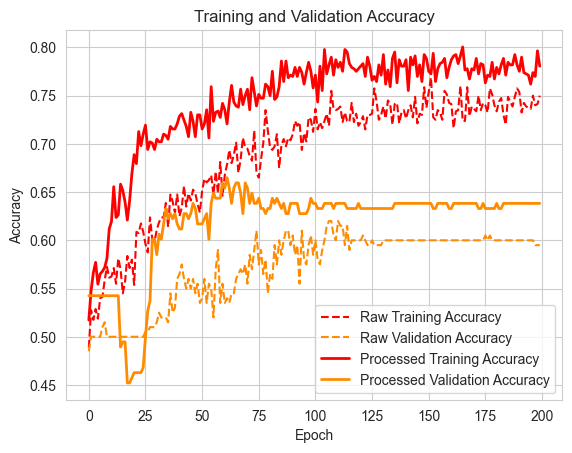

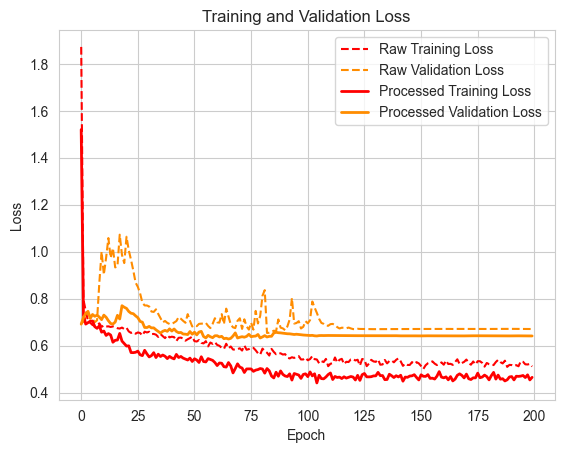

In [18]:
# Plot training and validation accuracy
plt.plot(history_raw.history['accuracy'], label='Raw Training Accuracy', color='red', linestyle='--')
plt.plot(history_raw.history['val_accuracy'], label='Raw Validation Accuracy', color='darkorange', linestyle='--')
plt.plot(history_processed.history['accuracy'], label='Processed Training Accuracy', color='red', linewidth=2)
plt.plot(history_processed.history['val_accuracy'], label='Processed Validation Accuracy', color='darkorange', linewidth=2)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history_raw.history['loss'], label='Raw Training Loss', color='red', linestyle='--')
plt.plot(history_raw.history['val_loss'], label='Raw Validation Loss', color='darkorange', linestyle='--')
plt.plot(history_processed.history['loss'], label='Processed Training Loss', color='red', linewidth=2)
plt.plot(history_processed.history['val_loss'], label='Processed Validation Loss', color='darkorange', linewidth=2)
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

7/7 [==============================] - 0s 56ms/step


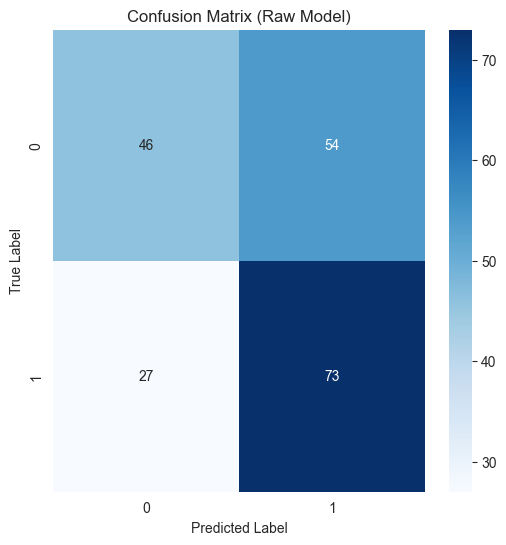

Classification Report (Raw Model)
              precision    recall  f1-score   support

           M       0.63      0.46      0.53       100
           F       0.57      0.73      0.64       100

    accuracy                           0.59       200
   macro avg       0.60      0.59      0.59       200
weighted avg       0.60      0.59      0.59       200


In [19]:
# Raw Model Evaluation
y_raw_pred_prob = model_raw.predict(X_val_raw)
y_raw_pred = np.argmax(y_raw_pred_prob, axis=1)
plot_confusion_matrix(np.argmax(y_val_raw, axis=1), y_raw_pred, title='Confusion Matrix (Raw Model)')
print_classification_report(np.argmax(y_val_raw, axis=1), y_raw_pred, target_names=['M', 'F'], title='Classification Report (Raw Model)')

6/6 [==============================] - 0s 11ms/step


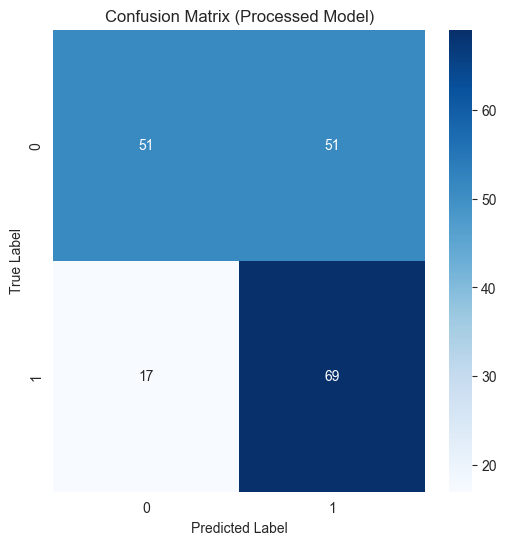

Classification Report (Processed Model)
              precision    recall  f1-score   support

           M       0.75      0.50      0.60       102
           F       0.57      0.80      0.67        86

    accuracy                           0.64       188
   macro avg       0.66      0.65      0.63       188
weighted avg       0.67      0.64      0.63       188


In [20]:
# Processed Model Evaluation
y_processed_pred_prob = model_processed.predict(X_val_processed)
y_processed_pred = np.argmax(y_processed_pred_prob, axis=1)
plot_confusion_matrix(np.argmax(y_val_processed, axis=1), y_processed_pred, title='Confusion Matrix (Processed Model)')
print_classification_report(np.argmax(y_val_processed, axis=1), y_processed_pred, target_names=['M', 'F'], title='Classification Report (Processed Model)')

Evaluation

In [16]:
# Define the path to the model and history files
path = r'C:\Skripsi\FingeprintClassification\model_res'

# Load raw and processed models
model_raw = load_model(os.path.join(path, 'model-dataset1-socofing-raw-final.h5'))
model_processed = load_model(os.path.join(path, 'model-dataset1-socofing-processed-final.h5'))

# Load history objects
history_raw = load_history(os.path.join(path, 'model-dataset1-socofing-raw-final_history.h5'))
history_processed = load_history(os.path.join(path, 'model-dataset1-socofing-processed-final_history.h5'))

In [16]:
print(history_raw)
print(history_processed)

{'accuracy': array([0.7854194 , 0.82656628, 0.83473212, 0.84695822, 0.85963798]), 'loss': array([0.48299944, 0.40928757, 0.38647816, 0.35865998, 0.33116844]), 'lr': array([0.001, 0.001, 0.001, 0.001, 0.001], dtype=float32), 'val_accuracy': array([0.80490232, 0.44410276, 0.83113241, 0.83203691, 0.76239145]), 'val_loss': array([0.71847606, 0.96012199, 0.41732451, 0.45236802, 0.51582271])}
{'accuracy': array([0.78598487, 0.81887889, 0.82931423, 0.83868331, 0.8517502 ]), 'loss': array([0.50002623, 0.42330059, 0.40021026, 0.37536368, 0.34975365]), 'lr': array([0.001, 0.001, 0.001, 0.001, 0.001], dtype=float32), 'val_accuracy': array([0.49240094, 0.80640495, 0.80758095, 0.82178396, 0.81970328]), 'val_loss': array([1.11984479, 0.53703421, 0.59225619, 0.44799402, 0.513107  ])}


In [17]:
# Socofing model raw data loading and splitting
_, X_val_raw, _, y_val_raw = [], [], [], []

for m_path, f_path in zip(m_paths_r, f_paths_r):
    m_files = load_data(m_path)
    f_files = load_data(f_path)
    
    X = np.concatenate((m_files, f_files), axis=0)
    y = np.array(['M'] * len(m_files) + ['F'] * len(f_files))
    
    y = np.array([gender_dict[g] for g in y])
    y = tf.keras.utils.to_categorical(y, num_classes=2)
    
    # Split data into training and validation sets
    _, X_val, _, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
    X_val_raw.extend(X_val)
    y_val_raw.extend(y_val)

X_val_raw = np.array(X_val_raw)
y_val_raw = np.array(y_val_raw)

In [18]:
# Socofing model processed data loading and splitting
_, X_val_processed, _, y_val_processed = [], [], [], []

for m_path, f_path in zip(m_paths_p, f_paths_p):
    m_files = load_data(m_path)
    f_files = load_data(f_path)
    
    X = np.concatenate((m_files, f_files), axis=0)
    y = np.array(['M'] * len(m_files) + ['F'] * len(f_files))
    
    y = np.array([gender_dict[g] for g in y])
    y = tf.keras.utils.to_categorical(y, num_classes=2)
    
    # Split data into training and validation sets
    _, X_val, _, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
    X_val_processed.extend(X_val)
    y_val_processed.extend(y_val)

X_val_processed = np.array(X_val_processed)
y_val_processed = np.array(y_val_processed)

KeyboardInterrupt: 

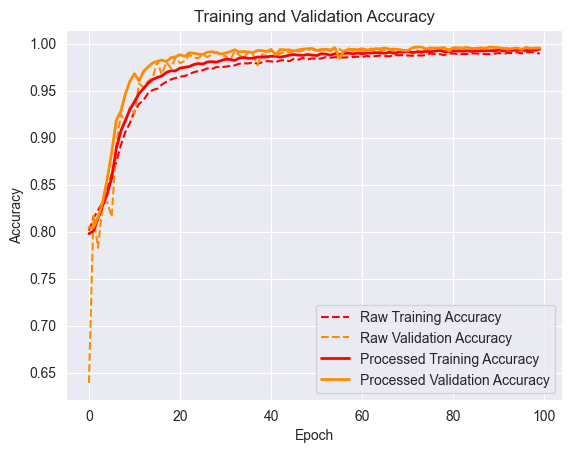

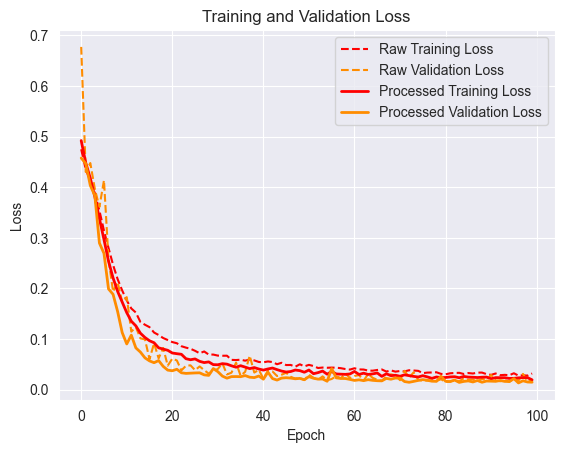

In [20]:
# Plot training and validation accuracy
plt.plot(history_raw['accuracy'], label='Raw Training Accuracy', color='red', linestyle='--')
plt.plot(history_raw['val_accuracy'], label='Raw Validation Accuracy', color='darkorange', linestyle='--')
plt.plot(history_processed['accuracy'], label='Processed Training Accuracy', color='red', linewidth=2)
plt.plot(history_processed['val_accuracy'], label='Processed Validation Accuracy', color='darkorange', linewidth=2)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history_raw['loss'], label='Raw Training Loss', color='red', linestyle='--')
plt.plot(history_raw['val_loss'], label='Raw Validation Loss', color='darkorange', linestyle='--')
plt.plot(history_processed['loss'], label='Processed Training Loss', color='red', linewidth=2)
plt.plot(history_processed['val_loss'], label='Processed Validation Loss', color='darkorange', linewidth=2)
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

346/346 [==============================] - 1s 4ms/step


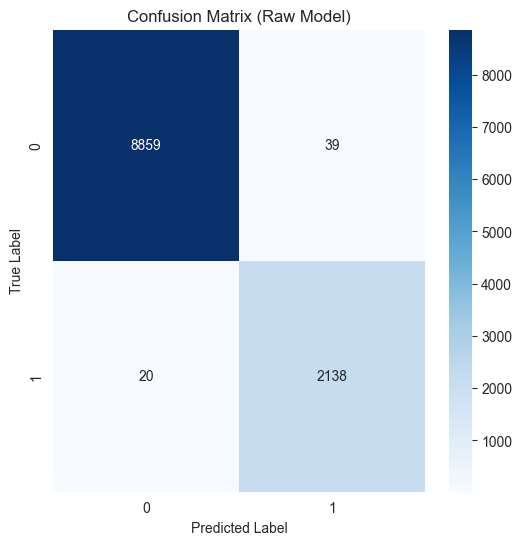

Classification Report (Raw Model)
              precision    recall  f1-score   support

           M       1.00      1.00      1.00      8898
           F       0.98      0.99      0.99      2158

    accuracy                           0.99     11056
   macro avg       0.99      0.99      0.99     11056
weighted avg       0.99      0.99      0.99     11056


In [21]:
y_raw_pred_prob = model_raw.predict(X_val_raw)
y_raw_pred = np.argmax(y_raw_pred_prob, axis=1)
plot_confusion_matrix(np.argmax(y_val_raw, axis=1), y_raw_pred, title='Confusion Matrix (Raw Model)')
print_classification_report(np.argmax(y_val_raw, axis=1), y_raw_pred, target_names=['M', 'F'], title='Classification Report (Raw Model)')

346/346 [==============================] - 2s 4ms/step


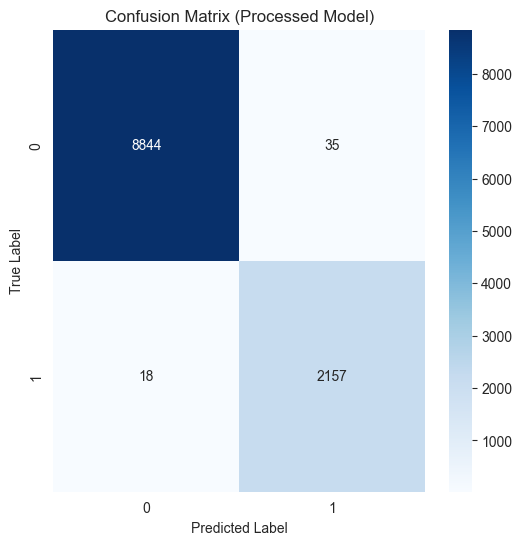

Classification Report (Processed Model)
              precision    recall  f1-score   support

           M       1.00      1.00      1.00      8879
           F       0.98      0.99      0.99      2175

    accuracy                           1.00     11054
   macro avg       0.99      0.99      0.99     11054
weighted avg       1.00      1.00      1.00     11054


In [22]:
y_processed_pred_prob = model_processed.predict(X_val_processed)
y_processed_pred = np.argmax(y_processed_pred_prob, axis=1)
plot_confusion_matrix(np.argmax(y_val_processed, axis=1), y_processed_pred, title='Confusion Matrix (Processed Model)')
print_classification_report(np.argmax(y_val_processed, axis=1), y_processed_pred, target_names=['M', 'F'], title='Classification Report (Processed Model)')

In [15]:
path = r'C:\Skripsi\FingeprintClassification\model_res'

model_raw = load_model(os.path.join(path, 'model-dataset2-family-raw.h5'))
model_processed = load_model(os.path.join(path, 'model-dataset2-family-processed.h5'))

history_raw = load_history(os.path.join(path, 'model-dataset2-family-raw_history.h5'))
history_processed = load_history(os.path.join(path, 'model-dataset2-family-processed_history.h5'))

In [16]:
model_raw.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 510, 510, 8)       80        
                                                                 
 batch_normalization_4 (Batc  (None, 510, 510, 8)      32        
 hNormalization)                                                 
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 255, 255, 8)      0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 253, 253, 16)      1168      
                                                                 
 batch_normalization_5 (Batc  (None, 253, 253, 16)     64        
 hNormalization)                                                 
                                                      

In [17]:
model_processed.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 254, 254, 8)       80        
                                                                 
 batch_normalization_9 (Batc  (None, 254, 254, 8)      32        
 hNormalization)                                                 
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 127, 127, 8)      0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 125, 125, 16)      1168      
                                                                 
 batch_normalization_10 (Bat  (None, 125, 125, 16)     64        
 chNormalization)                                                
                                                      

In [18]:
print(history_raw)
print(history_processed)

{'accuracy': array([0.55624998, 0.53750002, 0.60250002, 0.63125002, 0.65125   ,
       0.63      , 0.66624999, 0.66374999, 0.67500001, 0.71375   ,
       0.70375001, 0.70625001, 0.73374999, 0.74000001, 0.75125003,
       0.73374999, 0.77375001, 0.80250001, 0.77999997, 0.79624999,
       0.80250001, 0.83625001, 0.86000001, 0.85624999, 0.86750001,
       0.86500001, 0.88875002, 0.89625001, 0.89625001, 0.88625002,
       0.89249998, 0.89875001, 0.90375   , 0.89125001, 0.90625   ,
       0.89249998, 0.91874999, 0.90875   , 0.88999999, 0.91250002,
       0.91125   , 0.91000003, 0.91624999, 0.90375   , 0.91250002,
       0.92500001, 0.91374999, 0.90875   , 0.91000003, 0.91000003,
       0.91874999, 0.89875001, 0.89999998, 0.90875   , 0.91500002,
       0.91250002, 0.91000003, 0.91500002, 0.90625   , 0.92250001,
       0.91624999, 0.90875   , 0.92124999, 0.91500002, 0.92624998,
       0.92624998, 0.91500002, 0.89875001, 0.91624999, 0.91500002,
       0.90625   , 0.90625   , 0.91624999, 0.9225